<a href="https://colab.research.google.com/github/pVnpNdu02/WINEQUALITY-PREDICTION/blob/main/stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import basic necessary libraries
import numpy as np
import pandas as pd
#Below libraries used for Data visualization
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#Import basic necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:

#Importing the dataset from Kaggle Platform
df = pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [ ]:

df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [ ]:
df.shape

(1692, 7)

In [ ]:

from matplotlib import style
print(plt.style.available)



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


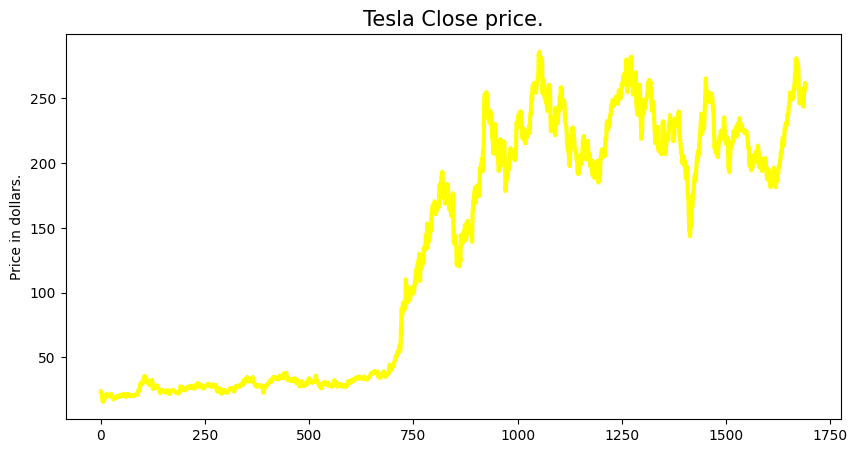

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(df['Close'],color = 'yellow', linestyle="solid", linewidth=3)
plt.style.use('dark_background')

plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [ ]:

#Fetch the initial top 5 values of the whole datasetA
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:

#Fetch the initial bottom 5 values of the whole datasetA
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [ ]:

print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [ ]:

df[df['Close'] == df['Adj Close']].shape

(1692, 7)

In [ ]:

#Checking the availability of null values in the dataset
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

<ipython-input-17-7885c7d42db3>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-17-7885c7d42db3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
<ipython-input-17-7885c7d42db3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new

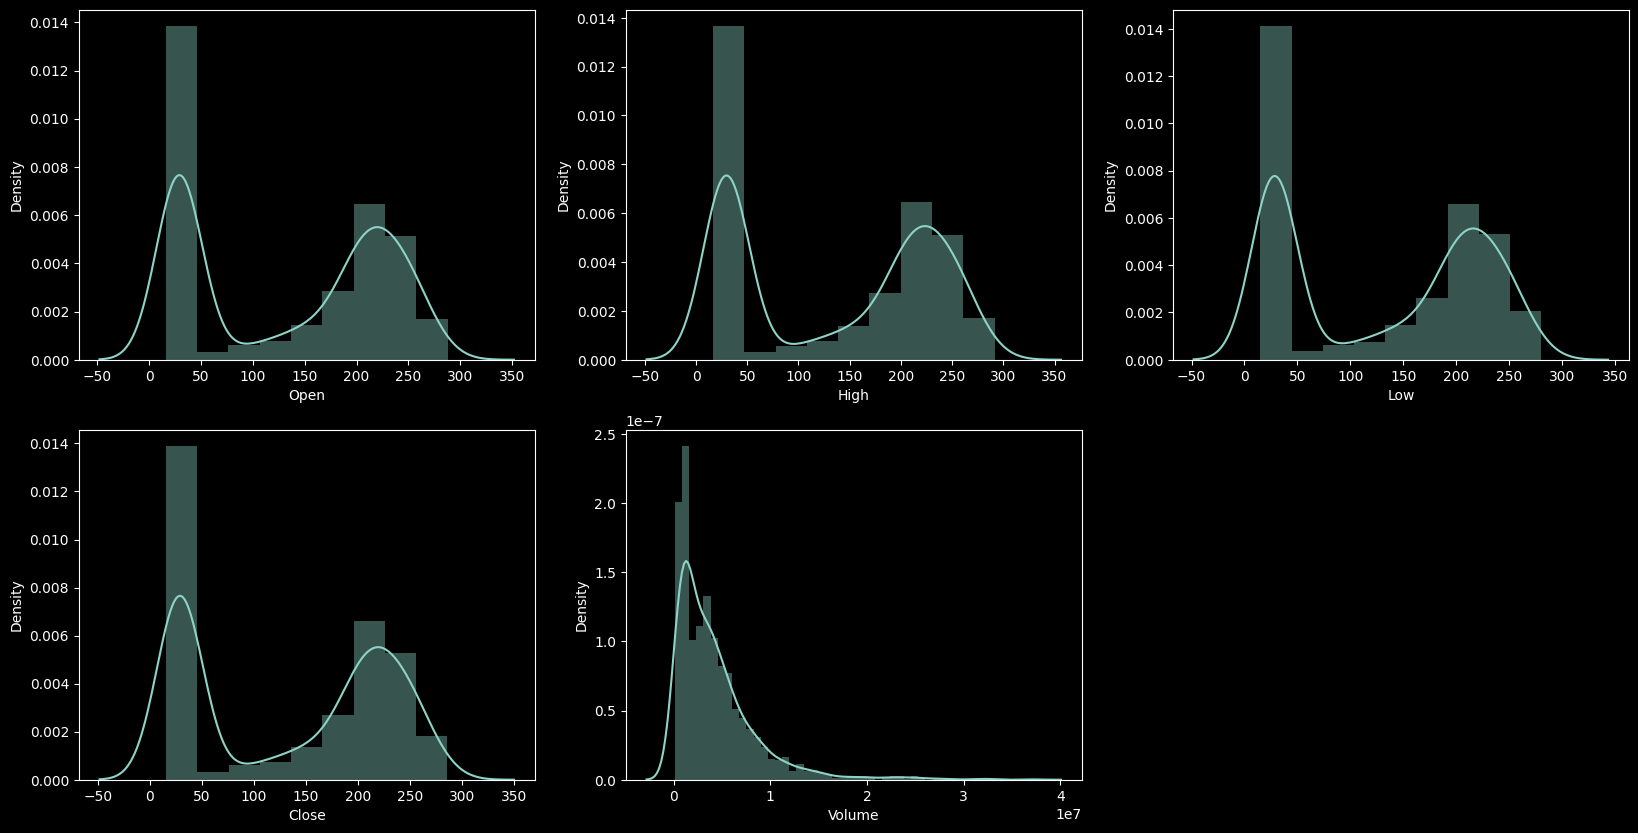

In [ ]:

features = ['Open', 'High', 'Low', 'Close', 'Volume']
# Feature selection done to maintain the core data
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In [ ]:
#Separation of Day, Month and year done from Date format to predict the stock variations category wise.
df['Date'] = pd.to_datetime(df['Date'])
df[['year', 'month', 'day']] = df['Date'].apply(lambda x: x.timetuple()[:3]).tolist()


In [ ]:

print(df['year'])

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
1687    2017
1688    2017
1689    2017
1690    2017
1691    2017
Name: year, Length: 1692, dtype: int64


In [ ]:

print(df['month'])

0       6
1       6
2       7
3       7
4       7
       ..
1687    3
1688    3
1689    3
1690    3
1691    3
Name: month, Length: 1692, dtype: int64


In [ ]:

print(df['day'])

0       29
1       30
2        1
3        2
4        6
        ..
1687    13
1688    14
1689    15
1690    16
1691    17
Name: day, Length: 1692, dtype: int64


<ipython-input-22-25dc239e8fc5>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


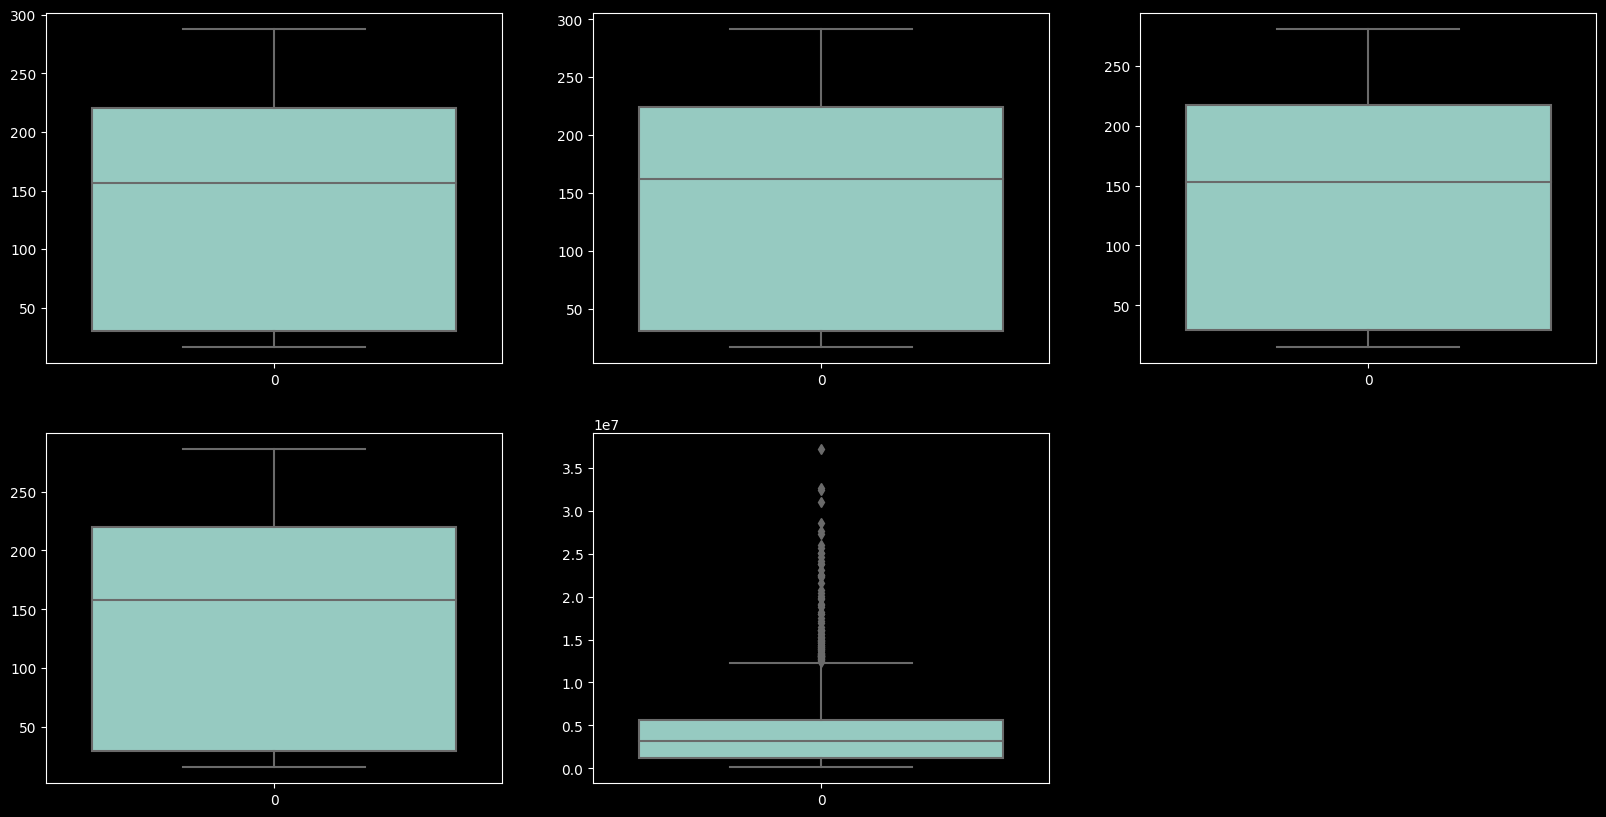

In [ ]:

#Finding the presence of outliers in the whole dataset so that model can give more precise prediction .
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()



In [ ]:

df['End_quater'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,year,month,day,End_quater
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,2010,6,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,2010,7,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2010,7,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,2010,7,6,0


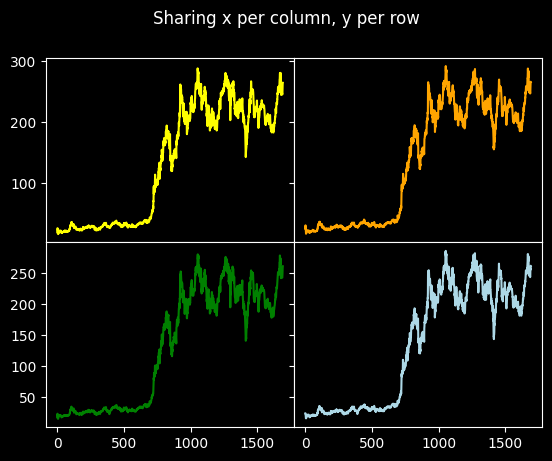

In [ ]:

#finding coorelation among the features of the data
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(df['Open'],color = 'yellow')
ax2.plot(df['High'],color = 'orange')
ax3.plot(df['Low'],color = 'green')
ax4.plot(df['Close'],color = 'lightblue')

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:

df.groupby('End_quater').mean()


<ipython-input-25-968678fdd2e0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('End_quater').mean()


,Open,High,Low,Close,Volume,Adj Close,year,month,day
End_quater,,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,130.797709,2013.353464,6.141208,15.686501
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,135.673269,2013.314488,7.584806,15.657244


In [ ]:

df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

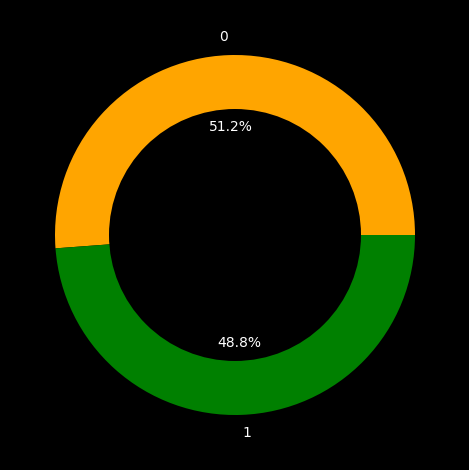

In [ ]:

plt.pie(df['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%',colors=['orange', 'green'])

centre_circle = plt.Circle((0,0),0.70,fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()


<ipython-input-28-9456cb4f053d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)


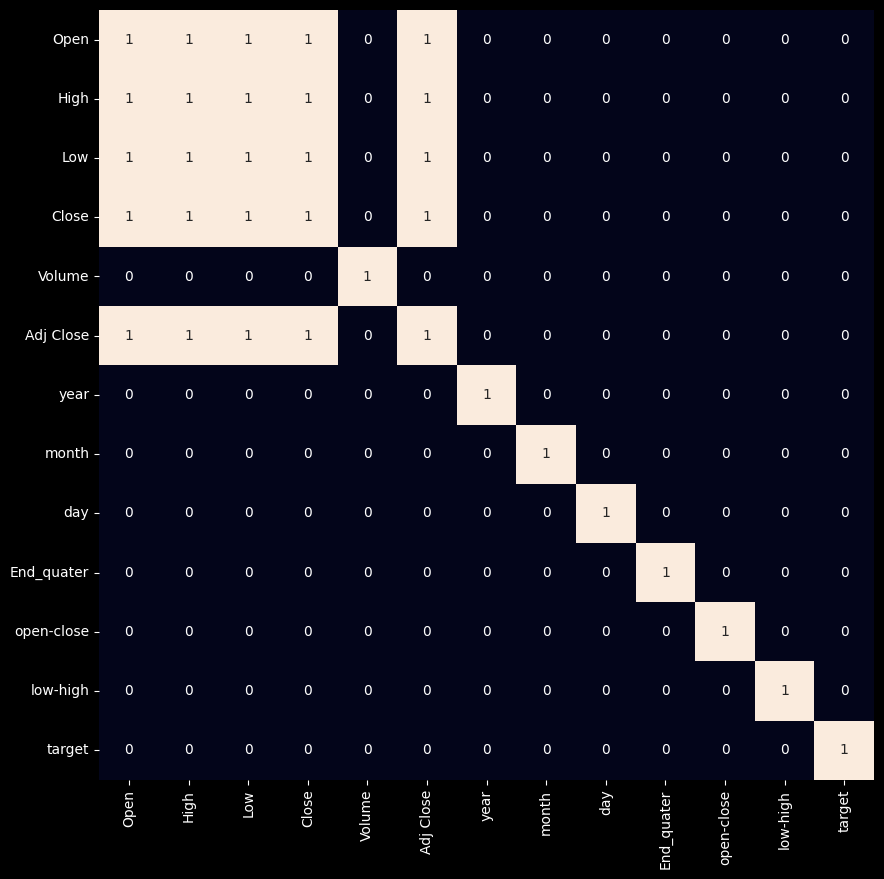

In [ ]:

#Using Heatmap to find the visualized corelation among the feature data entries
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()



In [ ]:

features = df[['open-close', 'low-high', 'End_quater']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1522, 3) (170, 3)


In [ ]:

models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.9764784110535405
Validation Accuracy :  0.5187569988801792

